**Harmonic Oscillator**

Block 1: Check that the trajectories are periodic

Block 2: Check that total energy is conserved.

**MD simulation**

Block 3: Check energy is conserved in hot.dat resp. cold.dat.

Block 4: Find the melting temperature

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patheffects as pe

In [2]:
# Block 1
df = pd.read_csv("verlet.csv")

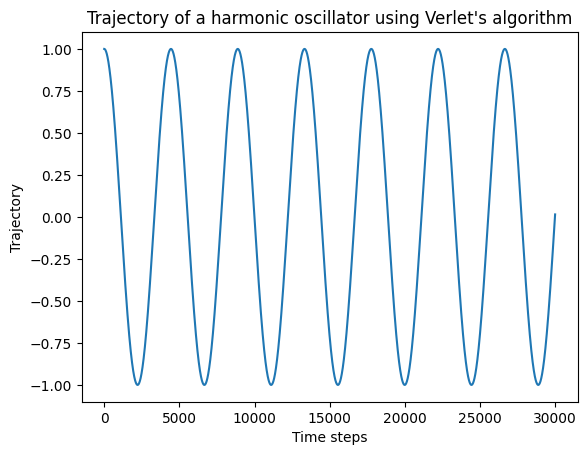

In [3]:
# Block 1
df.plot(x="Time", y="Position", 
        xlabel = 'Time steps', ylabel = 'Trajectory', 
        title = "Trajectory of a harmonic oscillator using Verlet's algorithm")
plt.legend().set_visible(False)
plt.savefig("Trajectory.png")
plt.show()


In [4]:
# Block 2
eTot = pd.read_csv("verlet.csv")

In [5]:
# Block 2
print("Total energy change (last - first):")
diff = eTot.loc[len(eTot) - 1, "Total energy"] - eTot.loc[0, "Total energy"]
print(diff)

Total energy change (last - first):
-4.999999999588667e-07


In [6]:
# Block 3 and 4

hot_time = []
cold_time = []
hot_temp = []
cold_temp = []
hot_energy = []
cold_energy = []

with open("MDiter_cold",'r') as f:
    cold = f.readlines()

with open("MDiter_hot",'r') as f:
    hot = f.readlines()
     
for line in cold:
    cold_time.append(float(line.split()[0]))
    cold_energy.append(float(line.split()[1]))
    cold_temp.append(float(line.split()[4]))
    
for line in hot:
    hot_time.append(float(line.split()[0]))
    hot_energy.append(float(line.split()[1]))
    hot_temp.append(float(line.split()[4]))
    



In [7]:
# Block 3
cold_diff = cold_energy[-1] - cold_energy[0]
hot_diff = hot_energy[-1] - hot_energy[0]
print("Cold energy difference:", cold_diff)
print("Hot energy difference:", hot_diff)

Cold energy difference: 0.02330597499
Hot energy difference: 0.0087055983


cold 1533.979020979021
hot 1531.2407592407592
tot 1532.60989010989


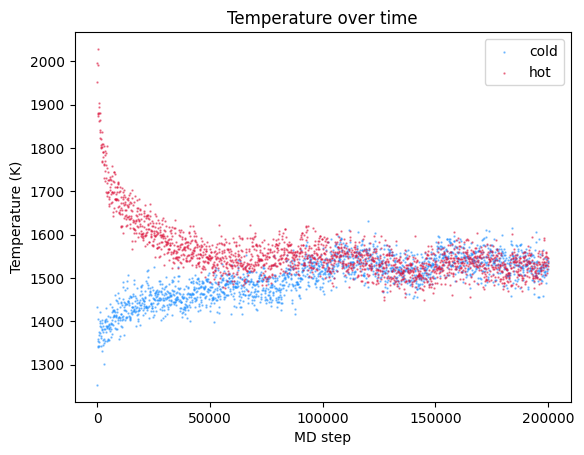

In [8]:
# Block 4
equi_time = cold_time + hot_time
equi_temp = cold_temp + hot_temp
    
fig, ax = plt.subplots()

ax.scatter(cold_time, cold_temp, s=0.5, alpha=0.5, c='dodgerblue')
ax.scatter(hot_time, hot_temp, s=0.5, alpha=0.5, c='crimson')
ax.set(xlabel='MD step', ylabel='Temperature (K)',
       title='Temperature over time')
ax.legend(['cold', 'hot'])
ax.set_xticks(range(0, 200001, 50000))

cold_avg = np.mean(cold_temp[1000:])
hot_avg = np.mean(hot_temp[1000:])
print("cold", cold_avg)
print("hot", hot_avg)
print("tot", np.mean([cold_avg, hot_avg]))


fig.savefig("Temperature.png", dpi=300)
plt.show()